# Malaria Detection using Cell Images

In [1]:
import os

In [2]:
os.chdir(r'E:\Data Science Projects\Malaria Detection')

In [3]:
ls

 Volume in drive E has no label.
 Volume Serial Number is 0C92-5301

 Directory of E:\Data Science Projects\Malaria Detection

07/11/2020  03:49 PM    <DIR>          .
07/11/2020  03:49 PM    <DIR>          ..
07/11/2020  03:44 PM    <DIR>          Dataset
               0 File(s)              0 bytes
               3 Dir(s)  221,643,444,224 bytes free


#Importing libraries

In [5]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
#Resize all the images to this
IMAGE_SIZE=[224,224]
train_path='Dataset/Train'
test_path='Dataset/Test'

In [7]:
#Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
mobilnet=VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 220s 3us/step


In [9]:
for layer in mobilnet.layers:
    layer.trainable=False

In [10]:
folders=glob('Dataset/Train/*')

In [11]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [12]:
#Our layers - you can add more if you want
x=Flatten()(mobilnet.output)

In [14]:
prediction=Dense(len(folders),activation='softmax')(x)

#Create a model object
model=Model(inputs=mobilnet.input, outputs=prediction)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
from tensorflow.keras.layers import MaxPooling2D

In [18]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [19]:
#Tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [20]:
#Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set=train_datagen.flow_from_directory('Dataset/Train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 416 images belonging to 2 classes.


In [22]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [23]:
# fit the model
# Run the cell. It will take some time to execute
r=model.fit_generator(training_set,validation_data=test_set,
                     epochs=50,
                     steps_per_epoch=len(training_set),
                     validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 34s 3s/step - loss: 1.1363 - accuracy: 0.5721 - val_loss: 0.7409 - val_accuracy: 0.4030
Epoch 2/50
13/13 [==============================] - 29s 2s/step - loss: 0.6101 - accuracy: 0.6731 - val_loss: 0.9204 - val_accuracy: 0.3209
Epoch 3/50
13/13 [==============================] - 29s 2s/step - loss: 0.4839 - accuracy: 0.7524 - val_loss: 1.0938 - val_accuracy: 0.3582
Epoch 4/50
13/13 [==============================] - 27s 2s/step - loss: 0.4857 - accuracy: 0.7596 - val_loss: 1.2426 - val_accuracy: 0.3582
Epoch 5/50
13/13 [==============================] - 27s 2s/step - loss: 0.4677 - accuracy: 0.7548 - val_loss: 0.7076 - val_accuracy: 0.5896
Epoch 6/50
13/13 [==============================] - 27s 2s/step - loss: 0.4808 - accuracy: 0.7452 - val_loss: 0.8266 - val_accuracy: 0.4179
Epoch 7/50
13/13 [==============================] - 27s 2s/step - loss: 0.4282 - acc

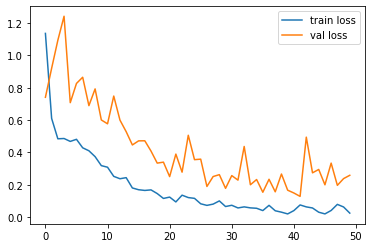

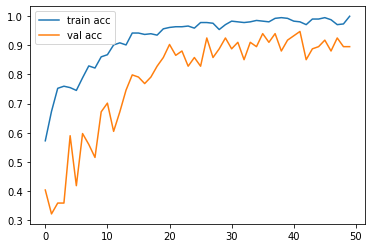

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [25]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[9.99383330e-01, 6.16621459e-04],
       [9.99007523e-01, 9.92465182e-04],
       [9.99992251e-01, 7.76697470e-06],
       [2.09318772e-01, 7.90681183e-01],
       [3.05885915e-03, 9.96941149e-01],
       [1.35272183e-03, 9.98647273e-01],
       [2.75140865e-05, 9.99972463e-01],
       [2.24550208e-03, 9.97754514e-01],
       [1.00000000e+00, 2.17742020e-08],
       [6.08163297e-01, 3.91836703e-01],
       [9.99999881e-01, 1.15738274e-07],
       [9.99991059e-01, 8.94464210e-06],
       [9.99999881e-01, 1.30094918e-07],
       [3.82040534e-03, 9.96179581e-01],
       [9.98917103e-01, 1.08292780e-03],
       [1.37865832e-02, 9.86213386e-01],
       [9.99997616e-01, 2.42995816e-06],
       [9.99987125e-01, 1.29024620e-05],
       [9.99992132e-01, 7.86789406e-06],
       [8.78948905e-03, 9.91210580e-01],
       [4.18926822e-04, 9.99581039e-01],
       [9.99937415e-01, 6.26274268e-05],
       [8.54572952e-02, 9.14542675e-01],
       [6.52646460e-03, 9.93473470e-01],
       [5.942433

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_vgg19.h5')

In [32]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [33]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [39]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
